In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('heart_failure.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

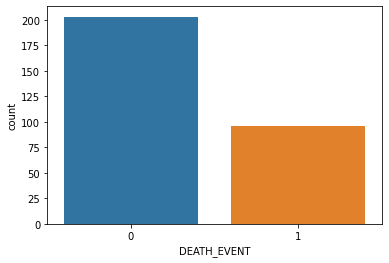

In [7]:
sns.countplot(x='DEATH_EVENT',data=df)

<AxesSubplot:xlabel='diabetes', ylabel='count'>

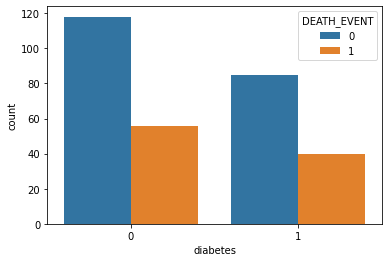

In [8]:
sns.countplot(x='diabetes', hue='DEATH_EVENT',data=df)

<AxesSubplot:>

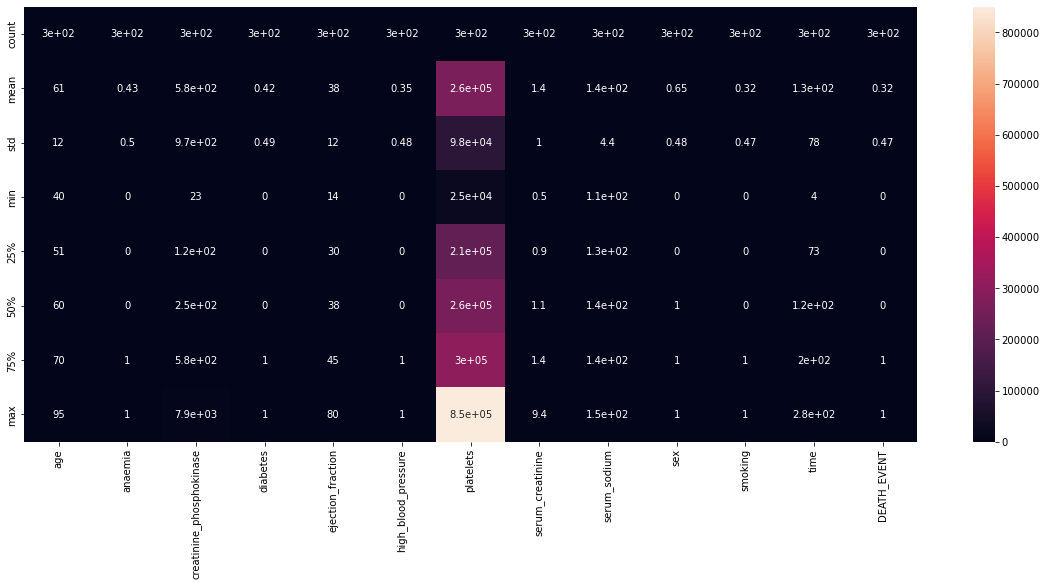

In [9]:
plt.figure(figsize=(20,8))
sns.heatmap(df.describe(),annot=True)


<AxesSubplot:>

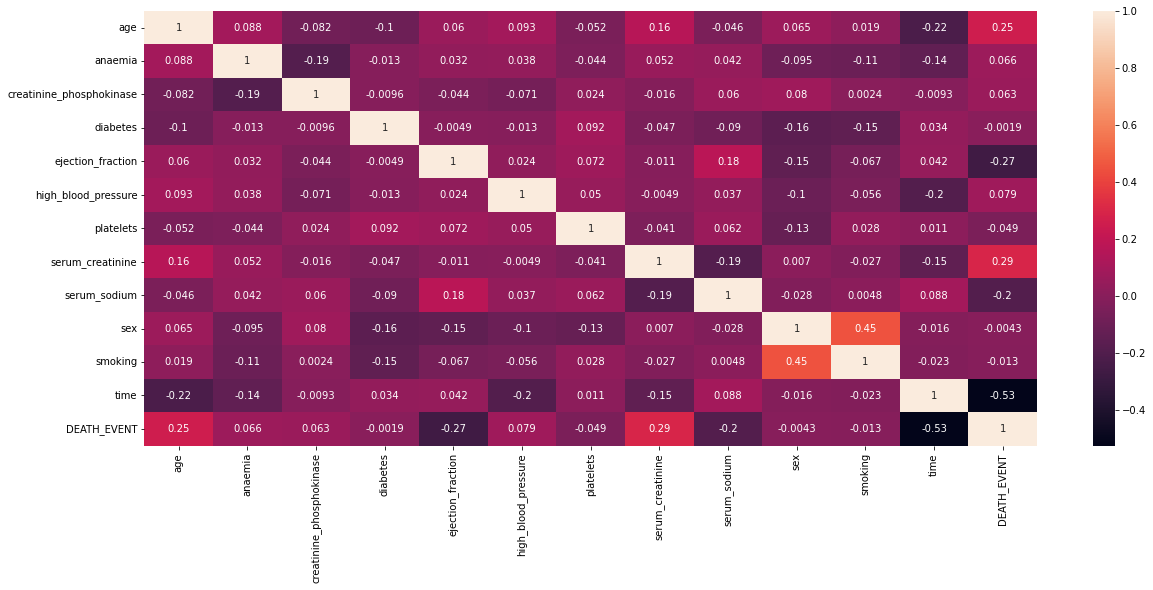

In [10]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True)


In [11]:
X=df.drop('DEATH_EVENT',axis=1)
Y=df['DEATH_EVENT']

In [12]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [13]:
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


# Train Test Splite

In [14]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=.3,random_state=42)

In [15]:
xtrain.shape

(209, 12)

In [16]:
xtest.shape

(90, 12)

# Decision Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
clf=DecisionTreeClassifier()

In [19]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [20]:
y_pred=clf.predict(xtest)

# Score

In [21]:
from sklearn.metrics import accuracy_score,plot_roc_curve,classification_report,confusion_matrix

In [22]:
clf.score(xtest,ytest)

0.6777777777777778

In [23]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74        53
           1       0.63      0.51      0.57        37

    accuracy                           0.68        90
   macro avg       0.67      0.65      0.66        90
weighted avg       0.67      0.68      0.67        90



In [24]:
confusion_matrix(ytest,y_pred)

array([[42, 11],
       [18, 19]], dtype=int64)

In [25]:
accuracy_score(ytest,y_pred)

0.6777777777777778

In [26]:
tp, fn, fp, tn = confusion_matrix(ytest,y_pred).reshape(-1) 

In [27]:
tn

19

# Roc Curve

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


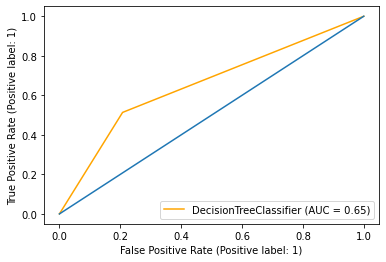

In [28]:
plot_roc_curve(clf,xtest,ytest,color='orange')
plt.plot([0,1],[0,1])

# Tree

In [29]:
from sklearn import tree

[Text(0.4605263157894737, 0.95, 'X[11] <= 67.5\ngini = 0.405\nsamples = 209\nvalue = [150, 59]'),
 Text(0.22807017543859648, 0.85, 'X[4] <= 72.5\ngini = 0.249\nsamples = 48\nvalue = [7, 41]'),
 Text(0.19298245614035087, 0.75, 'X[2] <= 109.5\ngini = 0.223\nsamples = 47\nvalue = [6, 41]'),
 Text(0.07017543859649122, 0.65, 'X[11] <= 24.0\ngini = 0.444\nsamples = 12\nvalue = [4, 8]'),
 Text(0.03508771929824561, 0.55, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.10526315789473684, 0.55, 'X[2] <= 101.5\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.07017543859649122, 0.45, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.14035087719298245, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3157894736842105, 0.65, 'X[2] <= 1818.5\ngini = 0.108\nsamples = 35\nvalue = [2, 33]'),
 Text(0.24561403508771928, 0.55, 'X[4] <= 47.5\ngini = 0.061\nsamples = 32\nvalue = [1, 31]'),
 Text(0.21052631578947367, 0.45, 'gini = 0.0\nsamples = 28\nvalue = [0, 28]'),
 Text(0.2807017543859

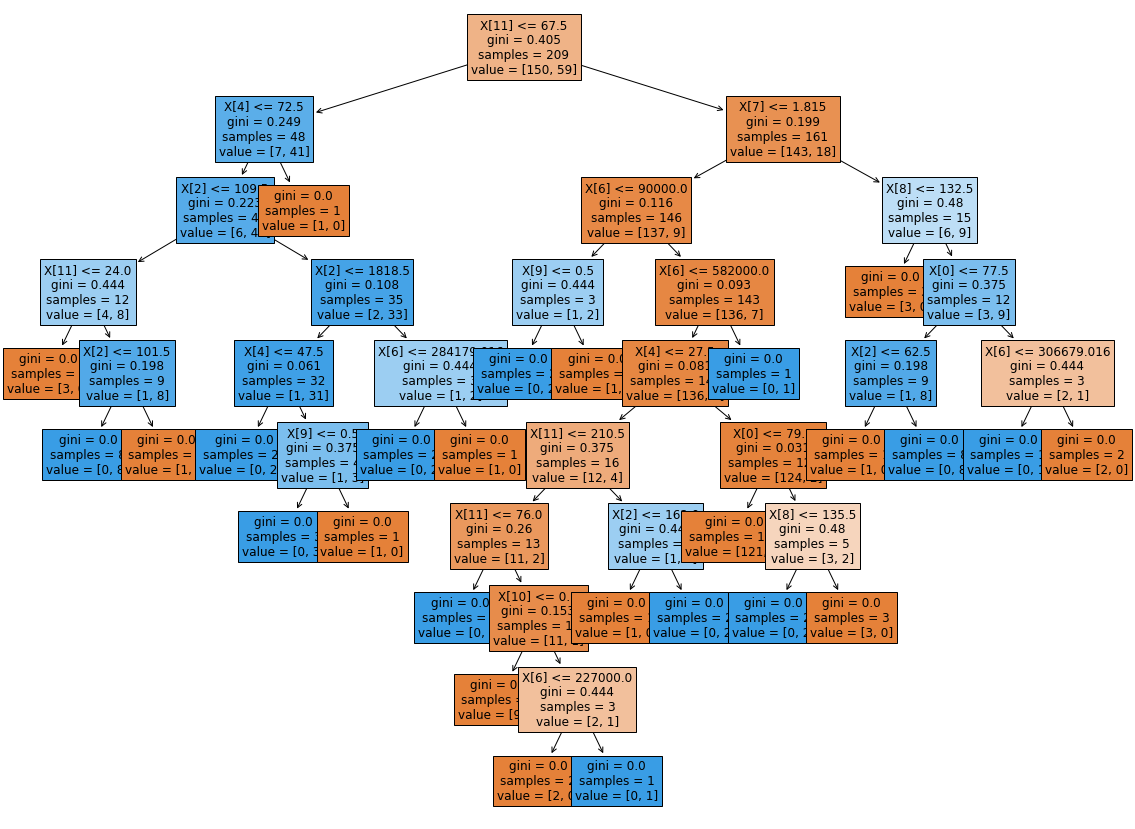

In [30]:
plt.figure(figsize=(20,15))
tree.plot_tree(clf,filled=True,fontsize=12)

# Cost Complexity with Post Pruning 
Pruning is a technique that is used to reduce overfitting. Pruning also simplifies a decision tree by removing the weakest rules

# In scikit-learns  DecisionTreeClassifier, ccp_alpha is the cost-complexity parameter.

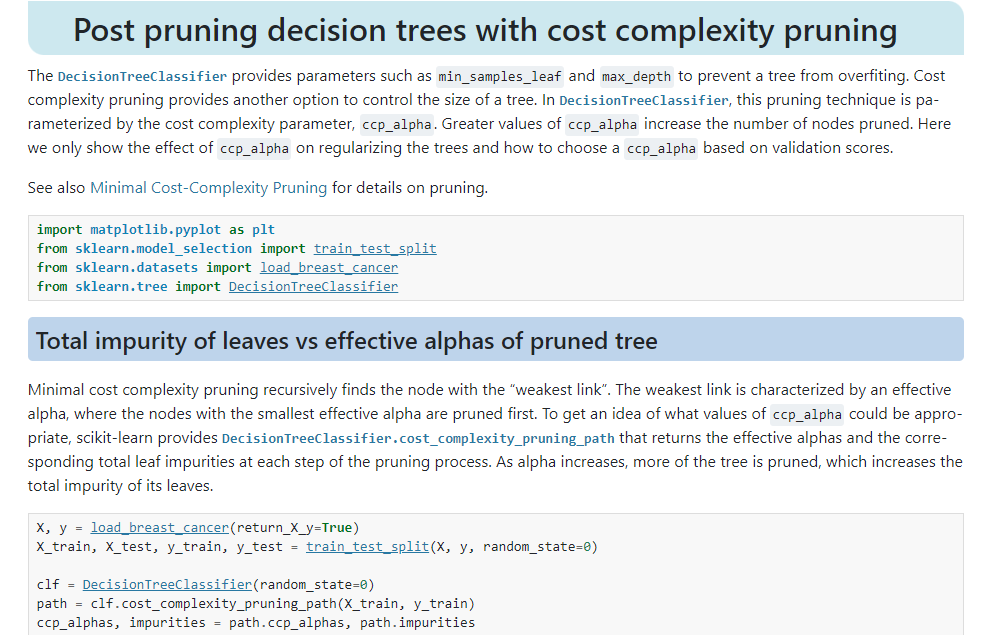

In [31]:
from IPython.display import Image
Image('download.png')

In [32]:
# Pruning: https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html 

In [34]:
pruning_path=clf.cost_complexity_pruning_path(xtrain,ytrain)
ccp_alpha_values=pruning_path.ccp_alphas
impurity_values=pruning_path.impurities

In [35]:
ccp_alpha_values

array([0.        , 0.00425306, 0.00438596, 0.00451128, 0.00637959,
       0.00637959, 0.00637959, 0.0066454 , 0.00677831, 0.00850611,
       0.00874962, 0.01022189, 0.01072915, 0.01291866, 0.03772605,
       0.19500242])

In [36]:
impurity_values

array([0.        , 0.00850611, 0.01727804, 0.03532316, 0.04170274,
       0.04808233, 0.05446191, 0.06110731, 0.07466393, 0.08317005,
       0.11816854, 0.14883422, 0.15956337, 0.17248203, 0.21020808,
       0.4052105 ])

In [37]:
clf_list=[]
for x in ccp_alpha_values:
    clf=DecisionTreeClassifier(random_state=42,ccp_alpha=x)
    clf.fit(xtrain,ytrain)
    clf_list.append(clf)
    

In [38]:
clf_list

[DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.0042530568846358315, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.004385964912280702, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.00451127819548872, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.006379585326953748, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.006379585326953748, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.006379585326953748, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.006645401382243489, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.006778309409888357, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.008506113769271663, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.008749623582159468, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.01022189311662996, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.010729149812849129, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.012918660287081336, random_state=42

# Compare

In [40]:
train_score=[clf.score(xtrain,ytrain) for clf in clf_list]

In [42]:
test_score=[clf.score(xtest,ytest) for clf in clf_list]

In [43]:
train_score

[1.0,
 1.0,
 0.9952153110047847,
 0.9856459330143541,
 0.9712918660287081,
 0.9712918660287081,
 0.9712918660287081,
 0.9712918660287081,
 0.9617224880382775,
 0.9473684210526315,
 0.9330143540669856,
 0.9138755980861244,
 0.9090909090909091,
 0.8947368421052632,
 0.8803827751196173,
 0.7177033492822966]

In [44]:
test_score

[0.6777777777777778,
 0.6777777777777778,
 0.6777777777777778,
 0.6888888888888889,
 0.6888888888888889,
 0.6888888888888889,
 0.6888888888888889,
 0.6888888888888889,
 0.6777777777777778,
 0.6666666666666666,
 0.7,
 0.7222222222222222,
 0.7333333333333333,
 0.7444444444444445,
 0.7666666666666667,
 0.5888888888888889]

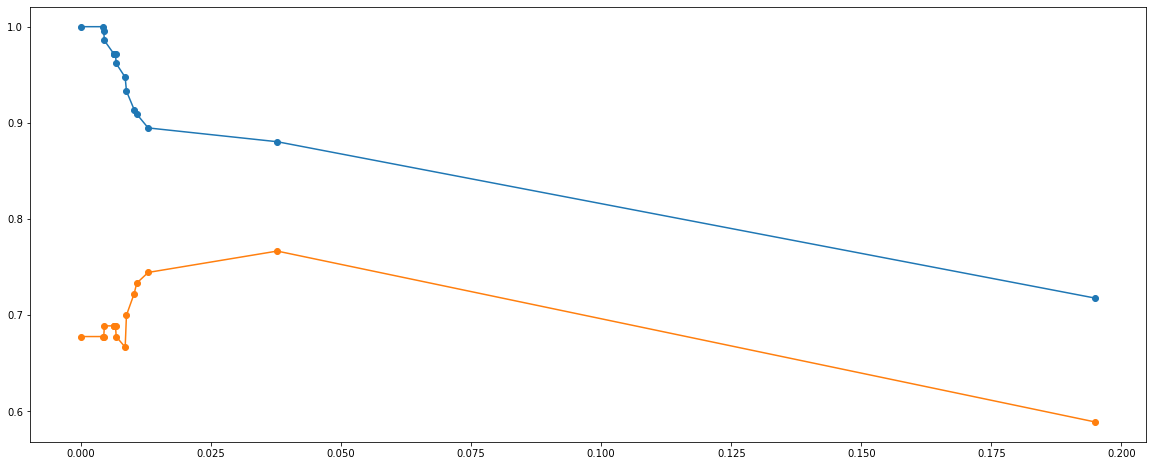

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.plot(ccp_alpha_values,train_score,'-o',label='Training Score')
plt.plot(ccp_alpha_values,test_score,'-o',label='Test Score')

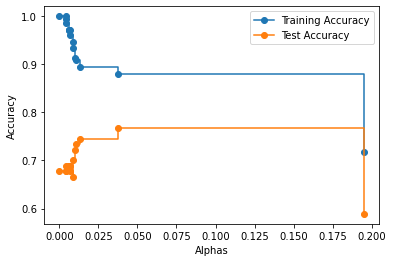

In [53]:
fig,ax=plt.subplots()
ax.set_xlabel('Alphas')
ax.set_ylabel('Accuracy')
plt.plot(ccp_alpha_values,train_score,'-o',label='Training Accuracy',drawstyle='steps-post')
plt.plot(ccp_alpha_values,test_score,'-o',label='Test Accuracy',drawstyle='steps-post')
ax.legend()

In [54]:
clf=DecisionTreeClassifier(random_state=42,ccp_alpha=0.05)

In [55]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.05, random_state=42)

In [58]:
pred=clf.predict(xtest)

In [59]:
accuracy_score(ytest,pred)

0.7666666666666667

[Text(0.5, 0.75, 'time <= 67.5\ngini = 0.405\nsamples = 209\nvalue = [150, 59]'),
 Text(0.25, 0.25, 'gini = 0.249\nsamples = 48\nvalue = [7, 41]'),
 Text(0.75, 0.25, 'gini = 0.199\nsamples = 161\nvalue = [143, 18]')]

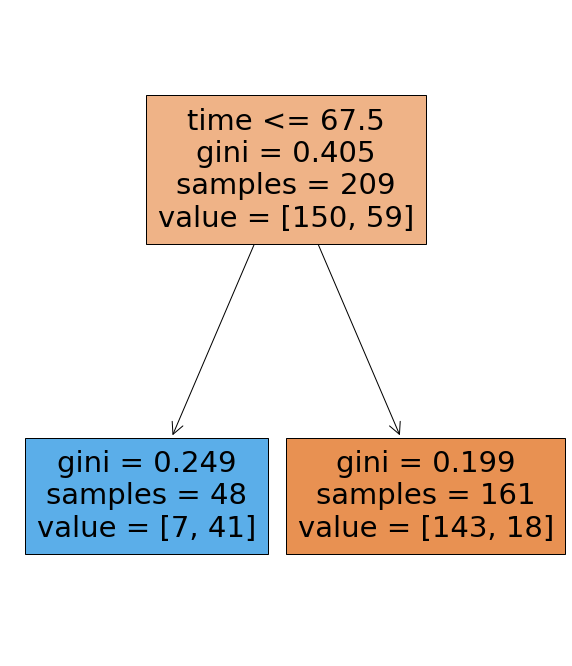

In [65]:
plt.figure(figsize=(10,12))
tree.plot_tree(clf,filled=True,feature_names=X.columns)

In [67]:
clf.score(xtrain,ytrain)

0.8803827751196173